In [1]:
!pip install --upgrade pip
!pip install pyiso
!pip install --upgrade seaborn

Requirement already up-to-date: pip in /home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages (20.1.1)
     |████████████████████████████████| 3.0 MB 4.4 MB/s eta 0:00:01     |███████████████                 | 1.4 MB 4.4 MB/s eta 0:00:01
     |████████████████████████████████| 83 kB 2.7 MB/s  eta 0:00:01
     |████████████████████████████████| 426 kB 49.3 MB/s eta 0:00:01
     |████████████████████████████████| 3.7 MB 52.6 MB/s eta 0:00:01
     |████████████████████████████████| 184 kB 68.8 MB/s eta 0:00:01
     |████████████████████████████████| 89 kB 15.0 MB/s eta 0:00:01
     |████████████████████████████████| 47 kB 4.9 MB/s  eta 0:00:01
  Created wheel for pyiso: filename=pyiso-0.4.0-py3-none-any.whl size=72833 sha256=4773f155134dc01c4ec084af51563635f3a3c7690dac694418b6cb6924349547
  Stored in directory: /home/ec2-user/.cache/pip/wheels/f9/ac/fa/99e54af30a77846650e0f15fa9379a01277d141060975428c1
  Created wheel for lxml: filename=lxml-3.6.4-cp36-cp36m-linux_x86_64.whl si

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime

import pyiso
from pyiso import client_factory

In [4]:
caiso_sp = 'SP15 EZ Gen DA LMP Peak'
caiso_np = 'NP15 EZ Gen DA LMP Peak'

---
## ICE Wholesale Price 2014 to 2020

In [3]:
# Time-related variables are 
ice_cols = ['price_hub', 'trade_date', 'delivery_start', 'delivery_end', 'high_price_$_mwh', 'low_price_$_mwh', 'wtd_avg_price_$_mwh', 'change', 'daily_vol_mwh', 'num_trades', 'num_counterparties']

ice14 = pd.read_excel('data/ice_electric-2014final.xls', names=ice_cols)
ice15 = pd.read_excel('data/ice_electric-2015final.xls', names=ice_cols)
ice16 = pd.read_excel('data/ice_electric-2016final.xls', names=ice_cols)
ice17 = pd.read_excel('data/ice_electric-2017final.xlsx', names=ice_cols)
ice18 = pd.read_excel('data/ice_electric-2018final.xlsx', names=ice_cols)
ice19 = pd.read_excel('data/ice_electric-2019final.xlsx', names=ice_cols)
ice20 = pd.read_excel('data/ice_electric-2020.xlsx', names=ice_cols)

ice_df_list=[ice14, ice15, ice16, ice17, ice18, ice19, ice20]
init_years = list(range(14,21))

In [4]:
def col_to_date(df):
    for d in df:
        d['trade_date'] = pd.to_datetime(d['trade_date'])
        d['delivery_start'] = pd.to_datetime(d['delivery_start'])
        d['delivery_end_date'] = pd.to_datetime(d['delivery_end_date'])

In [5]:
def create_df_sub(df_list, hub_name, keys_names, dict_name):
    for df, k in zip(df_list, keys_names):
        dict_name[k] =  df[df['price_hub'] == hub_name].copy()
        dict_name[k].drop('price_hub', axis=1, inplace=True)

In [6]:
np_dict = {}
sp_dict = {}
create_df_sub(ice_df_list, caiso_np, init_years, np_dict)
create_df_sub(ice_df_list, caiso_sp, init_years, sp_dict)

In [7]:
np_df = pd.concat(np_dict.values()).reset_index()
sp_df = pd.concat(sp_dict.values()).reset_index()

In [8]:
np_df.tail()


,index,trade_date,delivery_start,delivery_end,high_price_$_mwh,low_price_$_mwh,wtd_avg_price_$_mwh,change,daily_vol_mwh,num_trades,num_counterparties
566,194,2020-02-10,2020-02-11,2020-02-11,28.00,28.00,28.00,-2.28,400,1,2
567,195,2020-03-10,2020-03-11,2020-03-11,31.50,31.50,31.50,3.50,400,1,2
568,196,2020-03-11,2020-03-12,2020-03-12,35.25,35.25,35.25,3.75,800,2,2
569,197,2020-04-13,2020-04-14,2020-04-14,23.00,23.00,23.00,-12.25,400,1,2
570,198,2020-04-30,2020-05-01,2020-05-02,13.75,13.50,13.60,-9.40,4000,5,3


In [10]:
np_date_df = pd.DataFrame({'trade_date':pd.date_range(start='2014-01-01', end='2020-05-19')})
np_df_14_now = pd.merge(np_date_df, np_df, on='trade_date', how='left')
sp_date_df = pd.DataFrame({'trade_date':pd.date_range(start='2014-01-01', end='2020-05-19')})
sp_df_14_now = pd.merge(sp_date_df, sp_df, on='trade_date', how='left')

Text(0.5, 1.0, 'NP Price - 2014 to Present')

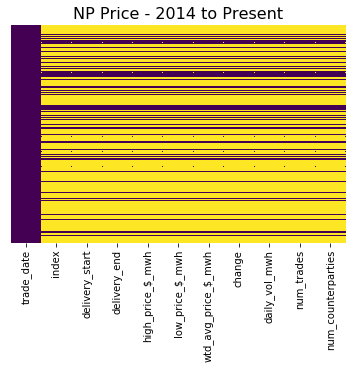

In [15]:
sns.heatmap(np_df_14_now.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('NP Price - 2014 to Present', fontsize=16)

In [22]:
np_df_14_now.head()

,trade_date,index,delivery_start,delivery_end,high_price_$_mwh,low_price_$_mwh,wtd_avg_price_$_mwh,change,daily_vol_mwh,num_trades,num_counterparties
0,2014-01-01,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-01-02,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-01-03,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-01-04,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-01-05,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'SP Price - 2014 to Present')

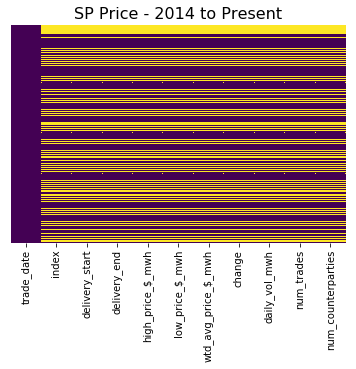

In [14]:
sns.heatmap(sp_df_14_now.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('SP Price - 2014 to Present', fontsize=16)

---
## Create Master Dataset for CAISO NP-15 and SP-15

In [17]:
ice_np_01_13 = pd.read_excel('data/NP 15 Hub.xls', names=ice_cols)
ice_sp1_01_13 = pd.read_excel('data/SP 15_1 Hub.xls', names=ice_cols)
ice_sp2_01_13 = pd.read_excel('data/SP 15_2 Hub.xls', names=ice_cols)

ice_np_01_13.drop('price_hub', axis=1, inplace=True)
ice_sp1_01_13.drop('price_hub', axis=1, inplace=True)
ice_sp2_01_13.drop('price_hub', axis=1, inplace=True)

calendar_01_now = pd.DataFrame({'trade_date':pd.date_range(start='2001-01-01', end='2020-05-19')})

In [104]:
# Create master NP dataset from 1/1/01 to 5/19/20.
# Remove duplicate values
np_concat = pd.concat([np_df_01_13, np_df_14_now], axis=0, sort=False)
np_master = pd.merge(calendar_01_now, np_concat, how='left', on='trade_date').reset_index()
np_duplicate = np_master.duplicated(subset='trade_date', keep='first')
np_dup_idx = np_duplicate[np_duplicate==True].index.values.tolist()
np_master.drop(index=np_dup_idx, inplace=True)
np_master.drop(['level_0', 'index'], axis=1, inplace=True)

In [105]:
# Remove trade_date duplicates.

np_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7079 entries, 0 to 7094
Data columns (total 10 columns):
trade_date             7079 non-null datetime64[ns]
delivery_start         1565 non-null datetime64[ns]
delivery_end           1565 non-null datetime64[ns]
high_price_$_mwh       1565 non-null float64
low_price_$_mwh        1565 non-null float64
wtd_avg_price_$_mwh    1565 non-null float64
change                 1564 non-null float64
daily_vol_mwh          1565 non-null float64
num_trades             1565 non-null float64
num_counterparties     1565 non-null float64
dtypes: datetime64[ns](3), float64(7)
memory usage: 608.4 KB


In [ ]:
plt.figure(figsize=(8,5))
sns.heatmap(np_master.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('CAISO NP-15 - 1/1/01 to 5/19/20', fontsize=16, fontweight='bold');

In [107]:
# Create master SP dataset from 1/1/01 to 5/19/20.
# Remove duplicate values
sp_concat = pd.concat([ice_sp1_01_13, ice_sp2_01_13, sp_df_14_now], axis=0, sort=False)
sp_master = pd.merge(calendar_01_now, sp_concat, how='left', on='trade_date').reset_index()
sp_duplicate = sp_master.duplicated(subset='trade_date', keep='first')
sp_dup_idx = sp_duplicate[sp_duplicate==True].index.values.tolist()
sp_master.drop(index=sp_dup_idx, inplace=True)
sp_master.drop(['level_0', 'index'], axis=1, inplace=True)

In [108]:
sp_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7079 entries, 0 to 7120
Data columns (total 10 columns):
trade_date             7079 non-null datetime64[ns]
delivery_start         4603 non-null datetime64[ns]
delivery_end           4603 non-null datetime64[ns]
high_price_$_mwh       4603 non-null float64
low_price_$_mwh        4603 non-null float64
wtd_avg_price_$_mwh    4603 non-null float64
change                 4602 non-null object
daily_vol_mwh          4603 non-null float64
num_trades             4603 non-null float64
num_counterparties     4603 non-null float64
dtypes: datetime64[ns](3), float64(6), object(1)
memory usage: 608.4+ KB


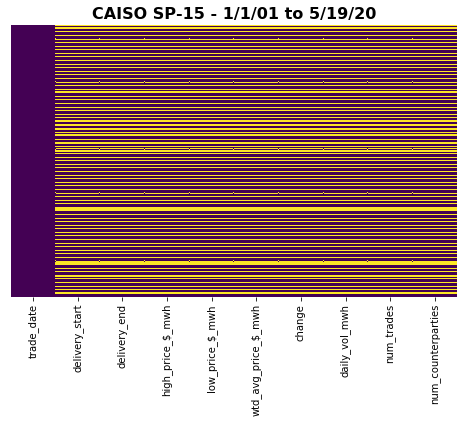

In [110]:
plt.figure(figsize=(8,5))
sns.heatmap(sp_master.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('CAISO SP-15 - 1/1/01 to 5/19/20', fontsize=16, fontweight='bold');

---
## Natural Gas

In [111]:
# Henry Hub Natural gas Spot Price (USD per Million Btu)
natgas = pd.read_excel('data/nat_gas.xls',sheet_name='Data 1', names=['trade_date', 'spot_price'], skiprows=2)
natgas_sub = natgas[natgas['trade_date'] > '2000-12-31'].copy().reset_index()
calendar_01_now = pd.DataFrame({'trade_date':pd.date_range(start='2001-01-01', end='2020-05-19')})
natgas_master = pd.merge(calendar_01_now, natgas, how='left', on='trade_date')
natgas_master.head()

,trade_date,spot_price
0,2001-01-01,NaN
1,2001-01-02,9.97
2,2001-01-03,9.71
3,2001-01-04,9.45
4,2001-01-05,10.03


In [112]:
natgas_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7079 entries, 0 to 7078
Data columns (total 2 columns):
trade_date    7079 non-null datetime64[ns]
spot_price    4881 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 165.9 KB


In [70]:
natgas_sub.tail()

,index,trade_date,spot_price
4883,5882,2020-05-21,1.75
4884,5883,2020-05-22,1.70
4885,5884,2020-05-26,1.79
4886,5885,2020-05-27,1.78
4887,5886,2020-05-28,1.79


In [67]:
natgas_sub_2 = natgas[natgas['trade_date'] > '2000-12-31'].copy().reset_index()

---
## pyiso and WattTime

In [33]:
hourly_calendar = pd.date_range(start='2017-03-01', end='2020-05-31', freq='h')
datetime_cap = datetime.strptime('2020-05-31 06:00:00', '%Y-%m-%d %H:%M:%S')

In [194]:
oasis_start = pd.date_range(start='2018-12-31', end='2020-05-31', freq='MS')
oasis_end = pd.date_range(start='2019-01-31', end='2020-06-05', freq='M')

In [196]:
len(oasis_end)

17

In [ ]:
#Use pyiso to scrape/parse OASIS generation and load data for the last 39 months.
caiso = client_factory('CAISO', timeout_seconds=60)
caiso_gen_dict = {}
caiso_load_dict = {}
for start, end in zip(oasis_start, oasis_end):
    caiso_gen_dict[start] = caiso.get_generation(start_at=start, end_at=end)
    caiso_load_dict[start] = caiso.get_load(start_at=start, end_at=end)


### CAISO Load Data

In [18]:
caiso_load_df = pd.DataFrame(columns=['timestamp', 'freq', 'market', 'ba_name', 'load_MW'])
for date in caiso_load_dict.keys():
    load_temp_df = pd.DataFrame(caiso_load_dict[date])
    caiso_load_df = pd.concat([caiso_load_df, load_temp_df], axis=0, sort=False)

caiso_load_df.sort_values(by='timestamp', inplace=True)
caiso_load_df = caiso_load_df.reset_index()
# caiso_load_df = caiso_load_df[caiso_load_df['timestamp'] <= datetime_cap].copy()
caiso_load_df['date'] = pd.to_datetime(caiso_load_df['timestamp']).dt.date
caiso_load_df['time'] = pd.to_datetime(caiso_load_df['timestamp']).dt.time
caiso_load_df['hour_start'] = pd.to_datetime(caiso_load_df['timestamp']).dt.hour
caiso_load_df.drop(['index', 'ba_name'], axis=1, inplace=True)
# Make dynanic
caiso_load_df.drop(index=caiso_load_df.index[329649:], axis=0, inplace=True)

caiso_load_pivot = caiso_load_df.pivot_table(index=['date', 'hour_start'], values='load_MW', aggfunc='sum').unstack().reset_index()
# caiso_load_pivot.drop('index', axis=1, inplace=True)
caiso_load_pivot.reset_index(inplace=True)
# caiso_load_pivot.sort_values(by=['date', 'hour_start'], axis=1, inplace=True)
# caiso_load_pivot.to_csv('data/caiso_load_mar_17_may_20_v02.csv')

NameError: name 'caiso_load_dict' is not defined

In [50]:
caiso_load_pivot.columns

Index(['index', 'date', 'hour_start', 'load_MW'], dtype='object')

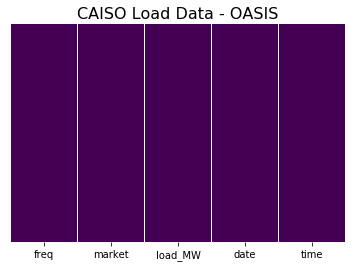

In [62]:
sns.heatmap(caiso_load_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('CAISO Load Data - OASIS', fontsize=16);

In [82]:
caiso_load_pivot = caiso_load_df.pivot_table(index='date', values='load_MW').reset_index()
caiso_load_pivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1188 entries, 0 to 1187
Data columns (total 2 columns):
date       1188 non-null object
load_MW    1188 non-null float64
dtypes: float64(1), object(1)
memory usage: 18.6+ KB


### CAISO Generation Data

In [57]:
caiso_gen_df = pd.DataFrame(columns=['ba_name', 'freq', 'fuel_name', 'gen_MW', 'market', 'timestamp'])
for date in caiso_gen_dict.keys():
    gen_temp_df = pd.DataFrame(caiso_gen_dict[date])
    caiso_gen_df = pd.concat([caiso_gen_df, gen_temp_df], axis=0)

caiso_gen_df.sort_values(by='timestamp', inplace=True)
caiso_gen_df = caiso_gen_df.reset_index()
caiso_gen_df = caiso_gen_df[caiso_gen_df['timestamp'] <= '2020-05-31 06:00:00'].copy()
caiso_gen_df['date'] = pd.to_datetime(caiso_gen_df['timestamp']).dt.date
caiso_gen_df['time'] = pd.to_datetime(caiso_gen_df['timestamp']).dt.time
caiso_gen_df['hour_start'] = caiso_gen_df['time'].hour
caiso_gen_df.drop(['index', 'ba_name'], axis=1, inplace=True)

caiso_gen_pivot = caiso_gen_df.pivot_table(index=['date', 'hour_start'], columns='fuel_type', values='gen_MW', aggfunc='sum').reset_index()
caiso_gen_pivot['total_mw'] = caiso_gen_pivot['other'] + caiso_gen_pivot['solar'] + caiso_gen_pivot['wind']
caiso_gen_pivot.sort_values(by=['date', 'hour_start'], axis=1, inplace=True)
# caiso_gen_df.to_csv('data/caiso_gen_mar_17_may_20.csv')

In [58]:
caiso_gen_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82722 entries, 0 to 82721
Data columns (total 6 columns):
freq         82722 non-null object
fuel_name    82722 non-null object
gen_MW       82722 non-null float64
market       82722 non-null object
date         82722 non-null object
time         82722 non-null object
dtypes: float64(1), object(5)
memory usage: 3.8+ MB


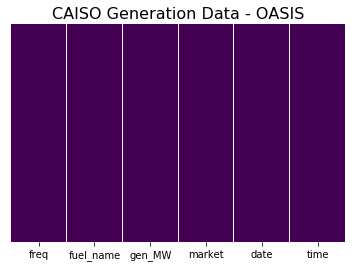

In [63]:
sns.heatmap(caiso_gen_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('CAISO Generation Data - OASIS', fontsize=16);

In [83]:
caiso_gen_pivot = caiso_gen_df.pivot_table(index='date', columns='fuel_name', values='gen_MW', aggfunc='sum').reset_index()
caiso_gen_pivot['total_mw'] = caiso_gen_pivot['other'] + caiso_gen_pivot['solar'] + caiso_gen_pivot['wind']
caiso_gen_pivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1188 entries, 0 to 1187
Data columns (total 5 columns):
date        1188 non-null object
other       1188 non-null float64
solar       1188 non-null float64
wind        1188 non-null float64
total_mw    1188 non-null float64
dtypes: float64(4), object(1)
memory usage: 46.5+ KB


In [ ]:
caiso_gen_he = caiso_gen_df.sort_values(by=['date', 'time'])

### CAISO Net Export-Import

Export less import.
Use as check.

In [ ]:
# date_obj = datetime.strptime('2017-04-01', '%Y-%m-%d')
# caiso_ex_im_dict[date_obj][0]

In [85]:
# caiso_ex_im_dict = {}
# for start, end in zip(oasis_start, oasis_end):
#      caiso_ex_im_dict[start] = caiso.get_trade(start_at=start, end_at=end)

In [99]:
caiso_net_ex_df = pd.DataFrame(columns=['net_exp_MW', 'timestamp', 'freq', 'market', 'ba_name'])
for date in caiso_ex_im_dict.keys():
    net_ex_temp_df = pd.DataFrame(caiso_ex_im_dict[date])
    caiso_net_ex_df = pd.concat([caiso_net_ex_df, net_ex_temp_df], axis=0, sort=False)

caiso_net_ex_df.sort_values(by='timestamp', inplace=True, ascending=True)
caiso_net_ex_df = caiso_ex_im_df.reset_index()
caiso_net_ex_df = caiso_ex_im_df[caiso_net_ex_df['timestamp'] <= '2020-05-31 06:00:00'].copy()
caiso_net_ex_df['date'] = pd.to_datetime(caiso_net_ex_df['timestamp']).dt.date
caiso_net_ex_df['time'] = pd.to_datetime(caiso_net_ex_df['timestamp']).dt.time
caiso_net_ex_df['hour'] = caiso_ex_im_df['time'].hour
caiso_net_ex_df.drop(['index', 'ba_name'], axis=1, inplace=True)


caiso_net_ex_pivot = caiso_net_ex_df.pivot_table(index=['date', 'hour_start'], columns='fuel_type', values='net_ex_MW', aggfunc='sum').reset_index()
caiso_net_ex_pivot.sort_values(by=['date', 'hour_start'], axis=1, inplace=True)

# caiso_ex_im_df.to_csv('data/caiso_net_ex_mar_17_may_20.csv')

In [100]:
caiso_ex_im_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329626 entries, 0 to 329625
Data columns (total 5 columns):
net_exp_MW    329626 non-null float64
freq          329626 non-null object
market        329626 non-null object
date          329626 non-null object
time          329626 non-null object
dtypes: float64(1), object(4)
memory usage: 12.6+ MB


{'net_exp_MW': -6241.3499999999985,
 'timestamp': datetime.datetime(2017, 4, 1, 7, 0, tzinfo=<UTC>),
 'freq': '5m',
 'market': 'RT5M',
 'ba_name': 'CAISO'}

---
# Data Processing 2 - Organize Dataframes in Hourly Manner

---
### Load Data

In [ ]:
load_df = pd.read_csv('data/caiso_load_mar_17_may_20.csv')
load_df_2 = load_df[(load_df['date'] <= oasis_end[-1]) & (load_df['date'] > oasis_end[-1]) ]

In [10]:
gen_data = pd.read_csv('data/caiso_gen_mar_17_may_20.csv')
gen_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82722 entries, 0 to 82721
Data columns (total 7 columns):
Unnamed: 0    82722 non-null int64
freq          82722 non-null object
fuel_name     82722 non-null object
gen_MW        82722 non-null float64
market        82722 non-null object
date          82722 non-null object
time          82722 non-null object
dtypes: float64(1), int64(1), object(5)
memory usage: 4.4+ MB


In [23]:
gen_data.head()

,Unnamed: 0,freq,fuel_name,gen_MW,market,date,time
0,0,1hr,other,12513.18,DAHR,2017-03-01,08:00:00
1,1,1hr,wind,240.45,DAHR,2017-03-01,08:00:00
2,2,1hr,solar,0.00,DAHR,2017-03-01,08:00:00
3,3,1hr,wind,199.55,DAHR,2017-03-01,09:00:00
4,4,1hr,solar,0.00,DAHR,2017-03-01,09:00:00


In [12]:
gen_data.tail()

,Unnamed: 0,freq,fuel_name,gen_MW,market,date,time
82717,82717,1hr,solar,0.00,DAHR,2020-05-31,05:00:00
82718,82718,1hr,wind,2706.14,DAHR,2020-05-31,05:00:00
82719,82719,1hr,solar,0.00,DAHR,2020-05-31,06:00:00
82720,82720,1hr,wind,2731.57,DAHR,2020-05-31,06:00:00
82721,82721,1hr,other,10017.39,DAHR,2020-05-31,06:00:00


In [14]:
load_data = pd.read_csv('data/caiso_load_mar_17_may_20.csv')
load_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329660 entries, 0 to 329659
Data columns (total 6 columns):
Unnamed: 0    329660 non-null int64
freq          329660 non-null object
market        329660 non-null object
load_MW       329660 non-null float64
date          329660 non-null object
time          329660 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 15.1+ MB


In [15]:
load_data.head()

,Unnamed: 0,freq,market,load_MW,date,time
0,0,5m,RT5M,20911.0,2017-03-01,08:00:00
1,1,5m,RT5M,20823.0,2017-03-01,08:05:00
2,2,5m,RT5M,20741.0,2017-03-01,08:10:00
3,3,5m,RT5M,20662.0,2017-03-01,08:15:00
4,4,5m,RT5M,20580.0,2017-03-01,08:20:00


In [35]:
load_data.tail(15)

,Unnamed: 0,freq,market,load_MW,date,time
329645,329645,5m,RT5M,23503.39,2020-05-31,05:45:00
329646,329646,5m,RT5M,23374.86,2020-05-31,05:50:00
329647,329647,5m,RT5M,23242.70,2020-05-31,05:55:00
329648,329648,5m,RT5M,23106.38,2020-05-31,06:00:00
329649,329649,5m,RT5M,22973.31,2020-05-31,06:05:00
329650,329650,5m,RT5M,22840.03,2020-05-31,06:10:00
329651,329651,5m,RT5M,22741.39,2020-05-31,06:15:00
329652,329652,5m,RT5M,22609.84,2020-05-31,06:20:00
329653,329653,5m,RT5M,22485.85,2020-05-31,06:25:00
329654,329654,5m,RT5M,22378.41,2020-05-31,06:30:00


In [18]:
net_ex_data = pd.read_csv('data/caiso_net_ex_mar_17_may_20.csv')
net_ex_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329626 entries, 0 to 329625
Data columns (total 6 columns):
Unnamed: 0    329626 non-null int64
net_exp_MW    329626 non-null float64
freq          329626 non-null object
market        329626 non-null object
date          329626 non-null object
time          329626 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 15.1+ MB


In [20]:
net_ex_data.head()

,Unnamed: 0,net_exp_MW,freq,market,date,time
0,0,-7449.98,5m,RT5M,2017-03-01,08:00:00
1,1,-7683.78,5m,RT5M,2017-03-01,08:05:00
2,2,-7890.83,5m,RT5M,2017-03-01,08:10:00
3,3,-7783.36,5m,RT5M,2017-03-01,08:15:00
4,4,-7778.36,5m,RT5M,2017-03-01,08:20:00


In [21]:
net_ex_data.tail()

,Unnamed: 0,net_exp_MW,freq,market,date,time
329621,329621,-9627.20,5m,RT5M,2020-05-31,06:35:00
329622,329622,-9635.75,5m,RT5M,2020-05-31,06:40:00
329623,329623,-9632.26,5m,RT5M,2020-05-31,06:45:00
329624,329624,-9488.47,5m,RT5M,2020-05-31,06:50:00
329625,329625,-9187.69,5m,RT5M,2020-05-31,06:55:00


---
# Create Master NP15, SP15, and ZP26 Master Dataframes

In [162]:
gen_17_20 = pd.read_csv('data/caiso_gen_mar_17_may_20.csv')
load_17_20 = pd.read_csv('data/caiso_load_mar_17_may_20.csv')
net_ex_17_20 = pd.read_csv('data/caiso_net_ex_mar_17_may_20.csv')
np15_lmp_19_20 = pd.read_csv('data/np15_lmp_19_20.csv')
sp15_lmp_19_20 = pd.read_csv('data/sp15_lmp_19_20.csv')
zp26_lmp_19_20 = pd.read_csv('data/zp26_lmp_19_20.csv')
natgas_19_20 = pd.read_csv('data/natgas_jan_19_may_20.csv', names=['date', 'HH_$_million_BTU_not_seasonal_adj'], skiprows=1)

In [35]:
begin_date_time = np15_lmp_19_20.iloc[0]['INTERVAL_START_PT']
end_date_time = np15_lmp_19_20.iloc[-1]['INTERVAL_END_PT']

In [36]:
end_date_time

'2020-05-31 00:00:00+00:00'

### Create Generation DF subset

In [37]:
gen_17_20['date_time'] = pd.to_datetime(gen_17_20['date'] + ' ' + gen_17_20['time'])
gen_pivot = gen_17_20.pivot_table(index='date_time',  columns='fuel_name', values='gen_MW', aggfunc='sum').reset_index()
gen_pivot['total_mw'] = gen_pivot['other'] + gen_pivot['solar'] + gen_pivot['wind']
gen_pivot.sort_values(by='date_time', inplace=True)
gen_19_20 = gen_pivot[(gen_pivot['date_time'] >= begin_date_time) & (gen_pivot['date_time'] <= end_date_time)].copy()
gen_19_20.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11273 entries, 16295 to 27567
Data columns (total 5 columns):
date_time    11273 non-null datetime64[ns]
other        11273 non-null float64
solar        11273 non-null float64
wind         11273 non-null float64
total_mw     11273 non-null float64
dtypes: datetime64[ns](1), float64(4)
memory usage: 528.4 KB


In [38]:
gen_19_20.tail()

fuel_name,date_time,other,solar,wind,total_mw
27563,2020-05-30 20:00:00,5600.43,10480.79,1921.63,18002.85
27564,2020-05-30 21:00:00,5741.04,10323.49,2174.53,18239.06
27565,2020-05-30 22:00:00,6561.28,9897.33,2387.21,18845.82
27566,2020-05-30 23:00:00,7569.98,8965.67,2565.19,19100.84
27567,2020-05-31 00:00:00,8340.18,7396.96,2667.82,18404.96


### Create Load DF subset

In [40]:
load_17_20['date_time'] = pd.to_datetime(load_17_20['date'] + ' ' + load_17_20['time'])
load_17_20['date_hour_start'] = load_17_20['date_time'].apply(lambda x: x.replace(microsecond=0,second=0, minute=0))
load_pivot = load_17_20.pivot_table(index='date_hour_start', values='load_MW', aggfunc='sum').reset_index()
load_pivot.sort_values(by='date_hour_start', inplace=True)
# load_pivot.head()
load_19_20 = load_pivot[(load_pivot['date_hour_start'] >= begin_date_time) & (load_pivot['date_hour_start'] <= end_date_time)].copy()
load_19_20.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11272 entries, 16291 to 27562
Data columns (total 2 columns):
date_hour_start    11272 non-null datetime64[ns]
load_MW            11272 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 264.2 KB


In [42]:
load_19_20.tail()

,date_hour_start,load_MW
27558,2020-05-30 20:00:00,244254.09
27559,2020-05-30 21:00:00,256453.21
27560,2020-05-30 22:00:00,267261.21
27561,2020-05-30 23:00:00,277929.30
27562,2020-05-31 00:00:00,291036.66


### Create Net Export DF subset

In [47]:
net_ex_17_20.columns

Index(['Unnamed: 0', 'net_exp_MW', 'freq', 'market', 'date', 'time',
       'date_time', 'date_hour_start'],
      dtype='object')

In [48]:
net_ex_17_20['date_time'] = pd.to_datetime(net_ex_17_20['date'] + ' ' + net_ex_17_20['time'])
net_ex_17_20['date_hour_start'] = net_ex_17_20['date_time'].apply(lambda x: x.replace(microsecond=0,second=0, minute=0))
net_ex_pivot = net_ex_17_20.pivot_table(index='date_hour_start', values='net_exp_MW', aggfunc='sum').reset_index()
net_ex_pivot.sort_values(by='date_hour_start', inplace=True)
# load_pivot.head()
net_ex_19_20 = net_ex_pivot[(net_ex_pivot['date_hour_start'] >= begin_date_time) & (net_ex_pivot['date_hour_start'] <= end_date_time)].copy()
net_ex_19_20.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11272 entries, 16291 to 27562
Data columns (total 2 columns):
date_hour_start    11272 non-null datetime64[ns]
net_exp_MW         11272 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 264.2 KB


#### Check

In [74]:
total_imp = net_ex_19_20['net_exp_MW'].sum()
total_gen = gen_19_20['total_mw'].sum()
total_load = load_19_20['load_MW'].sum()

print(f"Total genereation + total import = {total_gen}")
print(f"Total consumption = {total_load}")

Total genereation + total import = 200039455.41
Total consumption = 3145870543.61


In [75]:
total_

-1012493789.2

In [77]:
total_load - (total_gen - total_imp)

1933337299.0

### Merge All LMPs

In [93]:
all_lmp_19_20 = pd.merge(np15_lmp_19_20, sp15_lmp_19_20, how='left', on='INTERVAL_START_PT', suffixes=('_np15','_sp15'))
all_lmp_19_20 = pd.merge(all_lmp_19_20, zp26_lmp_19_20, how='left', on ='INTERVAL_START_PT')
all_lmp_19_20_clean = all_lmp_19_20[['INTERVAL_START_PT', 'INTERVAL_END_PT', 'OPR_DT_PT', 'OPR_HR_PT', 'OPR_INTERVAL', '$_MWH_np15', '$_MWH_sp15', '$_MWH']].copy()
all_lmp_19_20_clean['INTERVAL_START_PT'] = pd.to_datetime(all_lmp_19_20_clean['INTERVAL_START_PT']).apply(lambda x: x.replace(tzinfo=None))
all_lmp_19_20_clean['INTERVAL_END_PT'] = pd.to_datetime(all_lmp_19_20_clean['INTERVAL_END_PT']).apply(lambda x: x.replace(tzinfo=None))
all_lmp_19_20_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11519 entries, 0 to 11518
Data columns (total 8 columns):
INTERVAL_START_PT    11519 non-null datetime64[ns]
INTERVAL_END_PT      11519 non-null datetime64[ns]
OPR_DT_PT            11519 non-null object
OPR_HR_PT            11519 non-null int64
OPR_INTERVAL         11519 non-null int64
$_MWH_np15           11519 non-null float64
$_MWH_sp15           11519 non-null float64
$_MWH                11519 non-null float64
dtypes: datetime64[ns](2), float64(3), int64(2), object(1)
memory usage: 809.9+ KB


In [66]:
all_lmp_19_20_clean.head()

,INTERVAL_START_PT,INTERVAL_END_PT,OPR_DT_PT,OPR_HR_PT,OPR_INTERVAL,$_MWH_np15,$_MWH_sp15,$_MWH
0,2019-02-01 01:00:00+00:00,2019-02-01 02:00:00+00:00,2019-02-01,1,0,36.62123,36.04269,36.05743
1,2019-02-01 02:00:00+00:00,2019-02-01 03:00:00+00:00,2019-02-01,2,0,35.84812,35.15389,35.19706
2,2019-02-01 03:00:00+00:00,2019-02-01 04:00:00+00:00,2019-02-01,3,0,35.60431,34.87623,34.92977
3,2019-02-01 04:00:00+00:00,2019-02-01 05:00:00+00:00,2019-02-01,4,0,35.40240,34.69286,34.73189
4,2019-02-01 05:00:00+00:00,2019-02-01 06:00:00+00:00,2019-02-01,5,0,36.62816,36.03518,36.04623


### Natural Gas

In [161]:
natgas_19_20.head()

,date,HH_$_million_BTU_not_seasonal_adj
0,DATE,DHHNGSP
1,2019-01-02,3.25
2,2019-01-03,2.72
3,2019-01-04,2.8
4,2019-01-07,2.74


In [163]:
natgas_19_20['date'] = natgas_19_20['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
natgas_19_20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 2 columns):
date                                 375 non-null datetime64[ns]
HH_$_million_BTU_not_seasonal_adj    375 non-null object
dtypes: datetime64[ns](1), object(1)
memory usage: 5.9+ KB


### Create Master Dataframe All LMPs

In [81]:
all_lmp_19_20_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11519 entries, 0 to 11518
Data columns (total 8 columns):
INTERVAL_START_PT    11519 non-null object
INTERVAL_END_PT      11519 non-null object
OPR_DT_PT            11519 non-null object
OPR_HR_PT            11519 non-null int64
OPR_INTERVAL         11519 non-null int64
$_MWH_np15           11519 non-null float64
$_MWH_sp15           11519 non-null float64
$_MWH                11519 non-null float64
dtypes: float64(3), int64(2), object(3)
memory usage: 809.9+ KB


In [164]:
caiso_draft = pd.merge(all_lmp_19_20_clean, gen_19_20, how='left', left_on='INTERVAL_START_PT', right_on ='date_time')
caiso_draft = pd.merge(caiso_draft, load_19_20, how='left', left_on ='INTERVAL_START_PT', right_on = 'date_hour_start')
caiso_draft = pd.merge(caiso_draft, net_ex_19_20, how='left', left_on ='INTERVAL_START_PT', right_on = 'date_hour_start', suffixes=('_load', '_net_ex'))
caiso_draft['OPR_DT_PT'] = pd.to_datetime(caiso_draft['OPR_DT_PT'])
# Monday = 0
# Natural gas prices are not provided on Saturdays.
caiso_draft['day_week'] = caiso_draft['OPR_DT_PT'].apply(lambda x: x.weekday())
caiso_draft = pd.merge(caiso_draft, natgas_19_20, how='left', left_on='OPR_DT_PT', right_on='date', validate='m:1')
caiso_draft.head()

,INTERVAL_START_PT,INTERVAL_END_PT,OPR_DT_PT,OPR_HR_PT,OPR_INTERVAL,$_MWH_np15,$_MWH_sp15,$_MWH,date_time,other,solar,wind,total_mw,date_hour_start_load,load_MW,date_hour_start_net_ex,net_exp_MW,day_week,date,HH_$_million_BTU_not_seasonal_adj
0,2019-02-01 01:00:00,2019-02-01 02:00:00,2019-02-01,1,0,36.62123,36.04269,36.05743,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN,4,2019-02-01,2.7
1,2019-02-01 02:00:00,2019-02-01 03:00:00,2019-02-01,2,0,35.84812,35.15389,35.19706,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN,4,2019-02-01,2.7
2,2019-02-01 03:00:00,2019-02-01 04:00:00,2019-02-01,3,0,35.60431,34.87623,34.92977,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN,4,2019-02-01,2.7
3,2019-02-01 04:00:00,2019-02-01 05:00:00,2019-02-01,4,0,35.40240,34.69286,34.73189,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN,4,2019-02-01,2.7
4,2019-02-01 05:00:00,2019-02-01 06:00:00,2019-02-01,5,0,36.62816,36.03518,36.04623,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN,4,2019-02-01,2.7


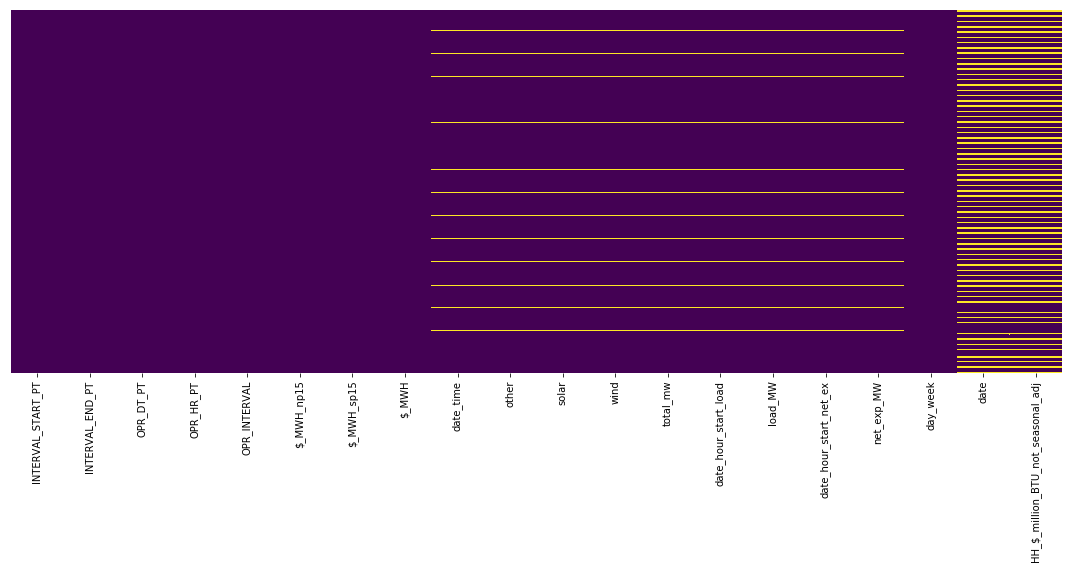

In [165]:
plt.figure(figsize=(15,8))
sns.heatmap(caiso_draft.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.tight_layout();

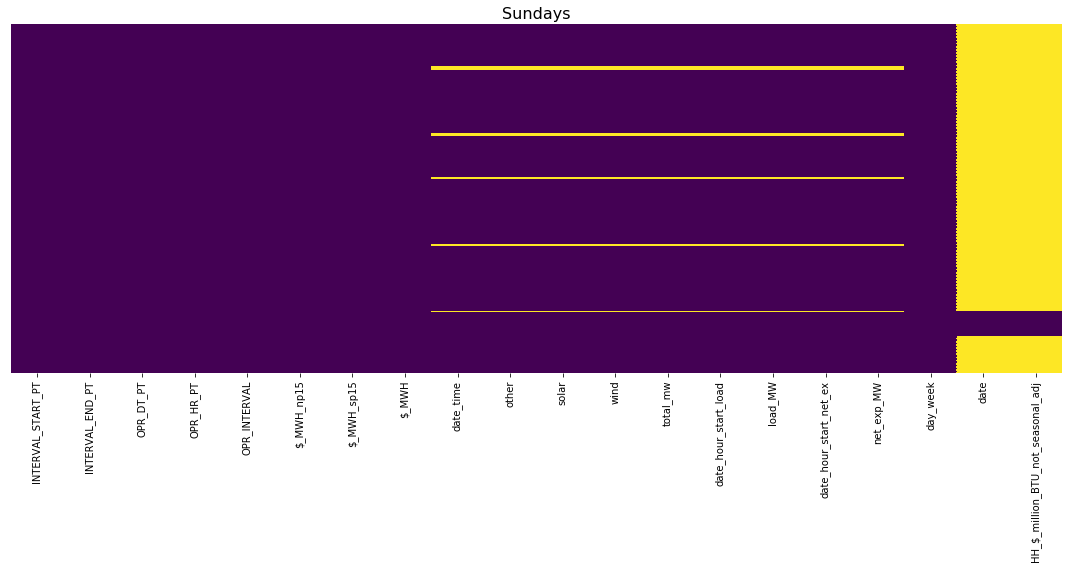

In [171]:
caiso_draft_sun = caiso_draft[caiso_draft['day_week'] == 6]
plt.figure(figsize=(15,8))
sns.heatmap(caiso_draft_sun.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Sundays', fontsize=16)
plt.tight_layout();

In [176]:
print(f"Total # of Null Values in Caiso Draft: {sum(caiso_draft['HH_$_million_BTU_not_seasonal_adj'].isnull())}")
print(f"# of null values on Sundays: {sum(caiso_draft_sun['HH_$_million_BTU_not_seasonal_adj'].isnull())}")
print(f"# of Saturdays: {(caiso_draft['day_week'] == 5).sum()}")

Total # of Null Values in Caiso Draft: 3168
# of null values on Sundays: 1512
# of Saturdays: 1656


In [177]:
(caiso_draft['day_week'] == 5).sum() + sum(caiso_draft_sun['HH_$_million_BTU_not_seasonal_adj'].isnull())

3168

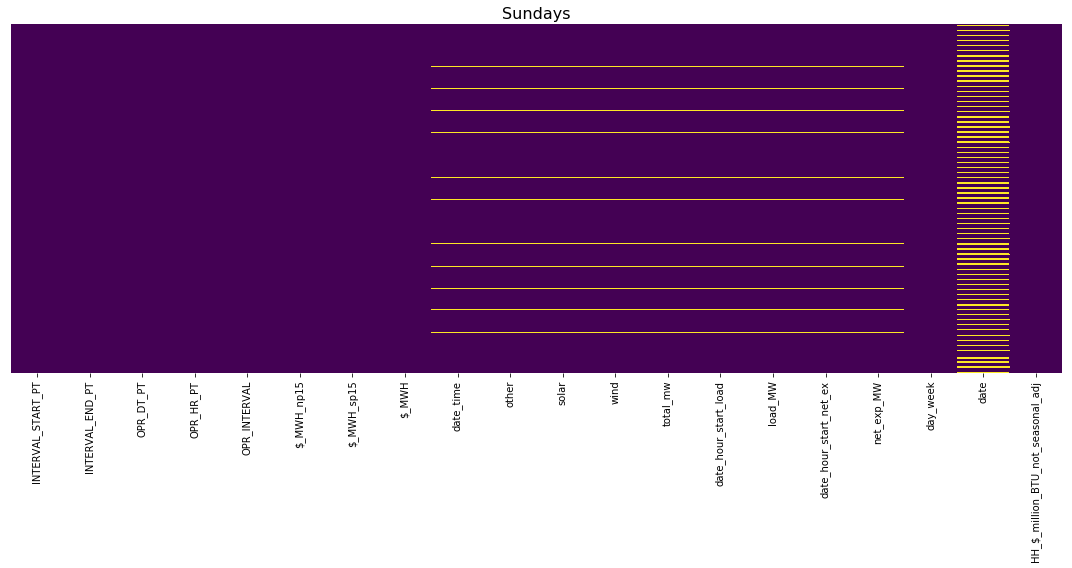

In [180]:
# front fill null values for HH price
caiso_draft_filled = caiso_draft.copy()
caiso_draft_filled['HH_$_million_BTU_not_seasonal_adj'] = caiso_draft_filled['HH_$_million_BTU_not_seasonal_adj'].fillna(method='ffill')
plt.figure(figsize=(15,8))
sns.heatmap(caiso_draft_filled.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Sundays', fontsize=16)
plt.tight_layout();

In [182]:
caiso_draft_gen_null = caiso_draft_filled[caiso_draft_filled['total_mw'].isnull()]
caiso_draft_gen_null.head(15)

,INTERVAL_START_PT,INTERVAL_END_PT,OPR_DT_PT,OPR_HR_PT,OPR_INTERVAL,$_MWH_np15,$_MWH_sp15,$_MWH,date_time,other,solar,wind,total_mw,date_hour_start_load,load_MW,date_hour_start_net_ex,net_exp_MW,day_week,date,HH_$_million_BTU_not_seasonal_adj
0,2019-02-01 01:00:00,2019-02-01 02:00:00,2019-02-01,1,0,36.62123,36.04269,36.05743,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN,4,2019-02-01,2.7
1,2019-02-01 02:00:00,2019-02-01 03:00:00,2019-02-01,2,0,35.84812,35.15389,35.19706,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN,4,2019-02-01,2.7
2,2019-02-01 03:00:00,2019-02-01 04:00:00,2019-02-01,3,0,35.60431,34.87623,34.92977,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN,4,2019-02-01,2.7
3,2019-02-01 04:00:00,2019-02-01 05:00:00,2019-02-01,4,0,35.40240,34.69286,34.73189,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN,4,2019-02-01,2.7
4,2019-02-01 05:00:00,2019-02-01 06:00:00,2019-02-01,5,0,36.62816,36.03518,36.04623,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN,4,2019-02-01,2.7
5,2019-02-01 06:00:00,2019-02-01 07:00:00,2019-02-01,6,0,42.66307,42.53757,42.32983,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN,4,2019-02-01,2.7
6,2019-02-01 07:00:00,2019-02-01 08:00:00,2019-02-01,7,0,49.38471,49.40988,49.15312,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN,4,2019-02-01,2.7
655,2019-02-28 08:00:00,2019-02-28 09:00:00,2019-02-28,8,0,49.32410,47.39166,47.89349,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN,3,2019-02-28,2.89
656,2019-02-28 09:00:00,2019-02-28 10:00:00,2019-02-28,9,0,41.16586,40.07978,40.36455,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN,3,2019-02-28,2.89
657,2019-02-28 10:00:00,2019-02-28 11:00:00,2019-02-28,10,0,44.07654,34.19808,33.53755,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN,3,2019-02-28,2.89
